## РК1, Вариант 13

# Черков Виталий, ИУ5-24М

- Задача 13
- Задача 33

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline 
sns.set(style="ticks")

In [60]:
data_loaded = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=",")

In [61]:
data_loaded.shape

(5110, 12)

In [62]:
data_loaded.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Задача 13

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "обратная зависимость - 1 / X".

In [63]:
data_loaded.age = 1 / data_loaded.age

In [64]:
data_loaded.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,0.012500,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,0.012346,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,0.028571,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,0.019608,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,0.022727,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Задача №33

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), алгоритм полного перебора (exhaustive feature selection).

In [65]:
data_loaded.Residence_type = data_loaded.Residence_type.map({
    'Urban': 1,
    'Rural': 2,
})

data_loaded.gender = data_loaded.gender.map({
    'Female': 1,
    'Male': 2,
})

data_loaded.ever_married = data_loaded.ever_married.map({
    'Yes': True,
    'No': False,
})

data_loaded.smoking_status = data_loaded.smoking_status.map({
    'never smoked': 1,
    'formerly smoked': 2,
    'smokes': 3,
    'Unknown': 4
})

ord_enc = OrdinalEncoder()
data_loaded["work_type"] = ord_enc.fit_transform(data_loaded[["work_type"]])

data_loaded.dropna(inplace=True)

data_loaded.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,14180,1.0,0.076923,0,0,False,4.0,2,103.08,18.6,4,0
5106,44873,1.0,0.012346,0,0,True,3.0,1,125.20,40.0,1,0
5107,19723,1.0,0.028571,0,0,True,3.0,2,82.99,30.6,1,0
5108,37544,2.0,0.019608,0,0,True,2.0,2,166.29,25.6,2,0
5109,44679,1.0,0.022727,0,0,True,0.0,1,85.28,26.2,4,0


In [66]:
data_loaded.work_type.unique()

array([2., 3., 0., 4., 1.])

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)

In [68]:
data_x = data_loaded.drop(columns=['stroke'])
data_y = data_loaded['stroke']

In [69]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(data_x, data_y, custom_feature_names=data_x.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 550/550

Best accuracy score: 0.96
Best subset (indices): (1, 4)
Best subset (corresponding names): ('gender', 'heart_disease')


#  Построить график "Скрипичная диаграмма (violin plot)"

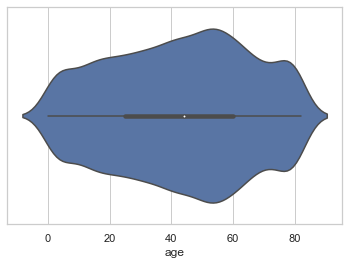

In [71]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=1 / data_loaded["age"])